<a href="https://colab.research.google.com/github/st3vejobs/DATA-604/blob/discussions/DATA_604_Discussion_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Discussion 1

I'll start with a very basic Law of Total Probability example I was thinking about the other day.

The Law of Total Probability is a relatively simple concept that can be applied to increasingly difficult situations. 



### Definition:

If *B_1,B_2,B_3,...* form a partition of the sample space S, then the probability of event A is: 
$$ P(A) = \sum P(A|B_i) \times P(B_i)$$

## Example


I was discussing the LOTP with my partner this week, and we were talking about a very basic example.

We roll a fair die, then we flip a coin. What is the probability of the coin flip being heads?

In this example, we should assume that the events are not independent. Let event A represent a coin flip of heads, and let event B represent the outcome of the die roll.

From the law of total probability, we can find the total probability of the coin flip being heads by finding the sum of the probability of heads given die rolls of (1,2,3,4,5,6) multiplied by the probability of each die roll. 

Assume a uniform probability for each possible outcome of the die roll and the coin flip. 

$$P(heads) = \sum P(heads | flip_i) \times P(flip_i)$$


$$P(heads|flip_1) = \frac {P(heads \cap flip_1)}{P(flip_1)}$$

$$P(heads \cap flip_1) = \frac {1}{12}$$

$$P(flip_1) = \frac 16$$

$$P(heads|flip_1) = \frac {\frac {1}{12}}{\frac 16} = \frac 12$$

$$P(heads) = \frac {1}{2} \times \frac 16 + \frac {1}{2} \times \frac 16 + \frac {1}{2} \times \frac 16 + \frac {1}{2} \times \frac 16 + \frac {1}{2} \times \frac 16 + \frac {1}{2} \times \frac 16$$

$$P(heads) = \frac {1}{12} \times 6$$

$$P(heads) = \frac {1}{2}$$

This is a very basic example, and we see here that the events are in fact independent as well. 

## Applying to a Simulation

Now that we have our "game", I will attempt to work it into a simulation that is repeated 1000 times, and I will see how well the probability works out. 

The goal is to find the probability the coin flip resulting in heads using the example from above. 

For simplicity, Heads will be assigned a value of 1, and Tails will be assigned a value of 0.

In [6]:
import numpy as np
from numpy import random
import pandas as pd

#np.random.seed(42)

die, dieprob = np.arange(1,7), np.repeat([1/6],6)
coin, coinprob = np.arange(0,2), np.repeat([1/2],2)
print(die, dieprob)
print(coin,coinprob)

results = pd.DataFrame(columns = ['Die', 'Coin'])
#print(results)

# Using loop and dataframe because the simulation is multiple steps. 

for i in range(1,1001):
  np.random.seed(i)
  roll = int(np.random.choice(die, size=1, p=dieprob))
  flip = int(np.random.choice(coin, size = 1, p=coinprob))
  results = results.append({'Die': roll, 'Coin': flip}, ignore_index=True)
#print(results)

##Now, I will use the rudimentary version of the Law of Total Probability. 
##It is plain to see that by summing the conditional outcomes of 1 and Heads and 2 and heads, etc. will lead to the same result as just adding the heads


#results['Die'] = results['Die'].astype(object)
results = pd.DataFrame(results)
assort = results[["Die", "Coin"]].groupby("Die").sum()
print(assort)


[1 2 3 4 5 6] [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
[0 1] [0.5 0.5]
     Coin
Die      
1     103
2      81
3      77
4      78
5      80
6      84


## Results

$$P(heads) = \frac {503}{1000}$$

$$P(heads_{(theoretical)} = \frac 12$$

# Doc Larry's Feedback

array([[  0, 498],
       [  1, 502]])

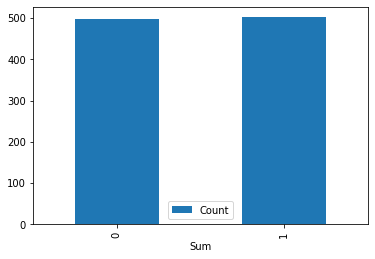

In [ ]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd
from numpy.random import default_rng
rng = default_rng(1234) #initialize seed
vals = rng.binomial(1,.5,1000) #generate 1000 flips from binomial (Bernoulli)
tally=np.transpose(np.unique(vals, return_counts=True)) #generate outcomes
pd.DataFrame(tally, columns=['Sum', 'Count']).plot.bar(x='Sum',y='Count') #plot
tally #enumerate

np.array([[  0, 498], [  1, 502]], dtype='int64')